In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("file:///C:/Users/asus/Downloads/customer_segmentation_data.csv")

In [5]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [8]:
df.duplicated().sum()

0

<Axes: xlabel='gender', ylabel='count'>

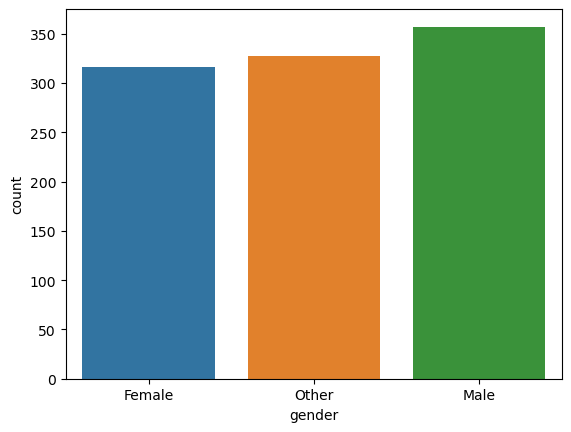

In [9]:
sns.countplot(data=df,x = 'gender')

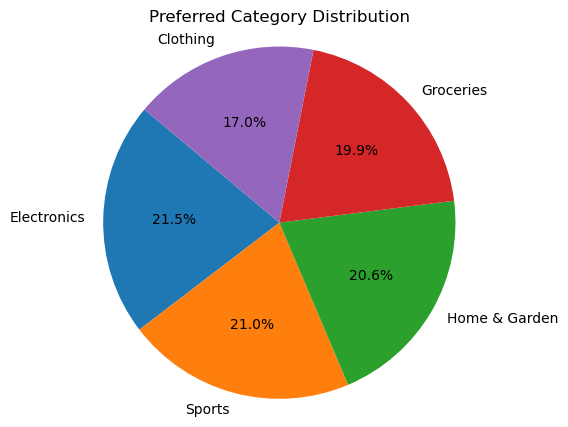

In [10]:
category_counts = df['preferred_category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Category Distribution')
plt.axis('equal') 
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='spending_score'>

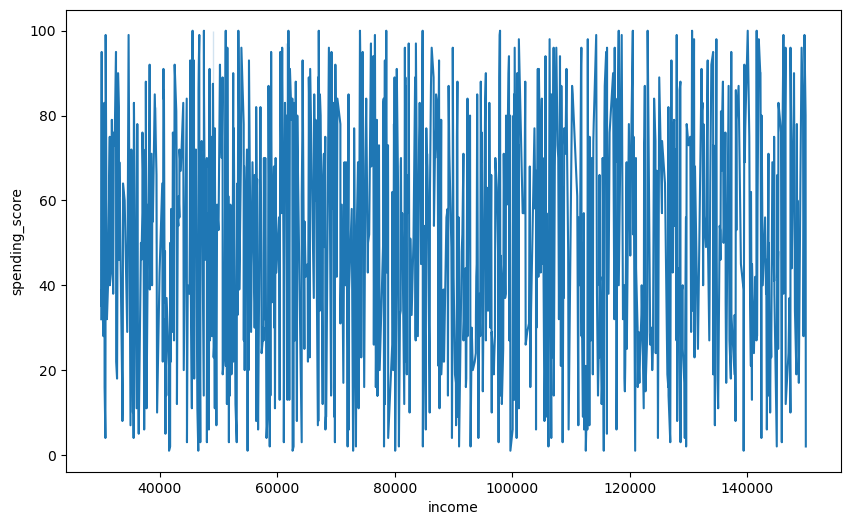

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,x='income',y='spending_score')

In [12]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


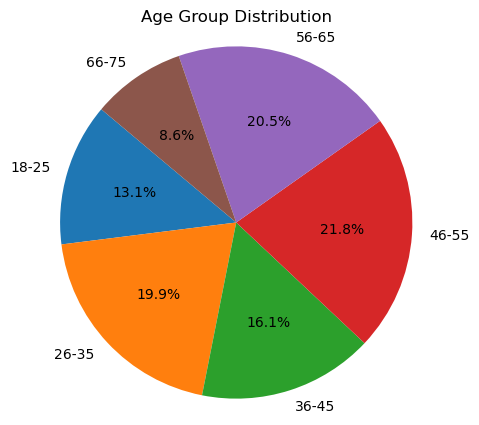

In [13]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate the counts for each age group
age_group_counts = df['age_group'].value_counts(sort=False)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [15]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group
0,1,38,0,99342,90,3,24,2,113.53,2
1,2,21,0,78852,60,2,42,4,41.93,0
2,3,60,0,126573,30,2,28,0,424.36,4
3,4,40,2,47099,74,9,5,3,991.93,2
4,5,65,0,140621,21,3,25,1,347.08,5


In [16]:
df=df.drop(['age_group'],axis=1)

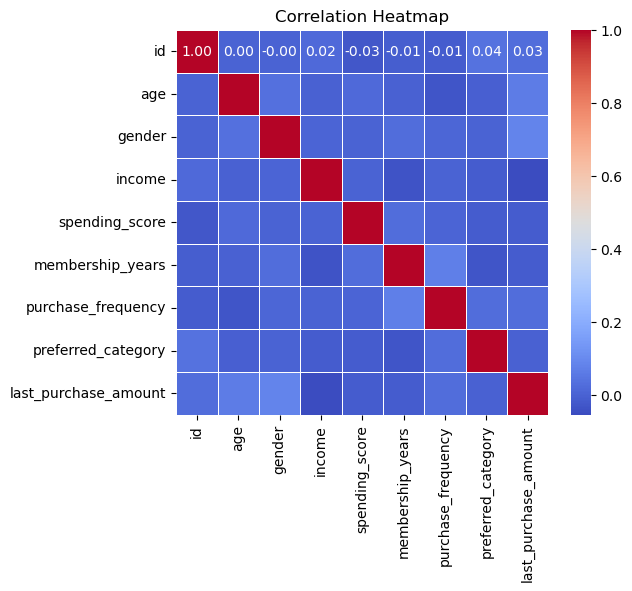

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_df = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6,5))  # Increased size for better visibility
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

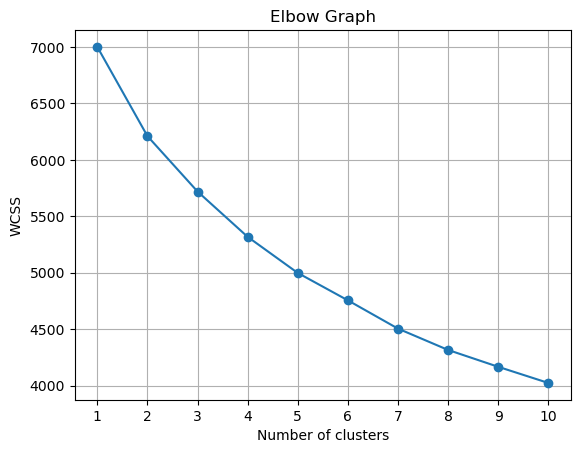

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize a StandardScaler to scale your numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_df)

# Define the range of clusters you want to try
min_clusters = 1
max_clusters = 10

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over the range of clusters
for i in range(min_clusters, max_clusters + 1):
    # Fit K-means clustering with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


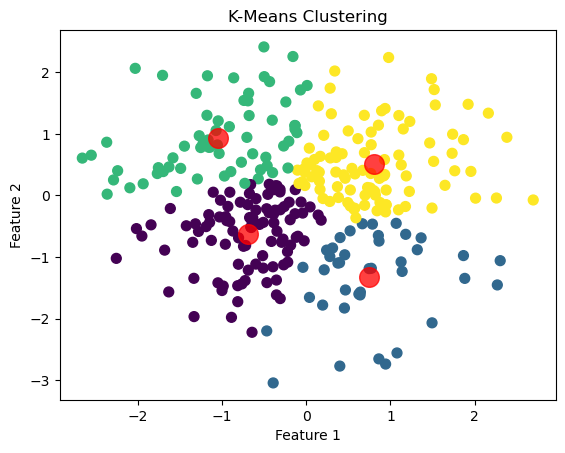

In [26]:
from sklearn.cluster import KMeans

# Generate sample data
np.random.seed(0)
X = np.random.randn(300, 2)

# Define the number of clusters
n_clusters = 4

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Predict the clusters for the data points
labels = kmeans.predict(X)

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
